# Лента Мёбиуса

## Понятие ленты Мёбиуса

Лента Мёбиуса (лист Мёбиуса, петля Мёбиуса) — топологический объект,
простейшая неориентируемая поверхность с краем, односторонняя при вложении в обычное трёхмерное евклидово пространство R^3.

Считается, что лента Мёбиуса была открыта независимо немецкими математиками Августом Фердинандом Мёбиусом и Иоганном Бенедиктом Листингом в 1858 году, хотя похожая структура изображена на римской мозаике III века нашей эры. Модель ленты Мёбиуса можно легко сделать: надо взять достаточно длинную бумажную полоску и склеить противоположные концы полоски в кольцо, предварительно перевернув один из них. В трёхмерном евклидовом пространстве существуют два типа полос Мёбиуса в зависимости от направления закручивания: правые и левые.

Эйлерова характеристика листа Мёбиуса равна нулю.

#### Математическое представление ленты Мёбиуса

$$\begin{cases}
    x(u,v) = (1+\frac{v}{2}cos(\frac{u}{2}))cos(u)\\
    y(u,v) = (1+\frac{v}{2}cos(\frac{u}{2}))sin(u)\\
    z(u,v) = \frac{v}{2}sin(\frac{u}{2})
 \end{cases}$$
 где  $0\leq u<2\pi$,
 
$-1\leq v \leq 1$

## Реализация

Активизируем возможность построения трехмерных графиков путем импорта набора инструментов **mplot3d** , включенного в основной установочный пакет библиотеки **Matplotlib** 

In [1]:
from mpl_toolkits import mplot3d

После импорта этого подмодуля появляется возможность создавать трехмерные системы координат путем передачи ключевого слова  *projection='3d'* любой из обычных функций создания систем координат. *%matplotlib inline* устанавливает бэкенд **matplotlib** для встроенного backend. При использовании встроенного бэкэнда графические диаграммы **matplotlib** будут включены в блокнот рядом с кодом. Импорт **numpy** для последующего использования таких команд, как: 
* **cos** - функция, вычисляющая тригонометрический косинус элементов массива,
* **sin** - функция, вычисляющая тригонометрический синус элементов массива, 
* **linspace** - функция, возвращающая одномерный массив из указанного количества элементов, значения которых равномерно распределенны внутри заданного интервала, 
* **meshgrid** - функция, создающая список массивов координатных сеток N-мерного координатного пространства для указанных одномерных массивов координатных векторов, 
* **ravel** - функция, возвращающая  сжатый до одной оси массив. 

Импорт модуля **pyplot** библиотеки **matplotlib** для создания графиков.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Начнём с создания рисунка и системы координат. В библиотеке **Matplotlib** можно рассматривать рисунок (экземпляр класса **plt.figure**) как единый контейнер, содержащий все объекты, представляющие систему  координат, графику, текст и метки. Система координат (она же — оси координат, экземпляры класса **plt.axes**) - ограничивающая область  с делениями и метками, в которой потом будут находиться составляющие нашу визуализацию элементы графика. Т.е. переменная **fig** будет использоваться для для экземпляра рисунка и **ax** для экземпляров системы координат или группы экземпляров систем координат.

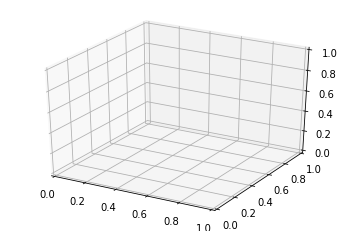

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Лента Мебиуса - это двумерная лента, поэтому нам понадобятся для нее две собственные координаты. Назовем одну из них u (ее диапазон значений — от 0 до 2π), а вторую — w, с диапазоном значений от –1 на одном краю ленты (по ширине) до 1 на другом

In [9]:
a = float(input("Введите левую границу u = "))

Введите левую границу u = 0


In [17]:
b = float(input("Введите коэффициент при Pi для правой границы u = "))

Введите коэффициент при Pi для правой границы u = 2


In [18]:
c = float(input("Введите левую границу v = "))

Введите левую границу v = -1


In [19]:
d = float(input("Введете правую границу v = "))

Введете правую границу v = 1


In [20]:
u = np.linspace(a, b * np.pi, 30)        
v = np.linspace(c, d, 32)
v, u = np.meshgrid(v, u) 

 Чтобы получилась лента Мебиуса, полоска должна выполнить половину скручивания за время полного сворачивания в кольцо, то есть $\Delta\phi$ = u / 2.

In [21]:
phi = 0.5 * u

Теперь нужно на основе параметризации вычислить координаты *(x, y, z)* ленты. в данном случае происходят два вращательных движения: одно — изменение расположения кольца относительно его центра (координата, которую мы назвали u ), а второе — скручивание полоски относительно ее оси координат (назовем эту координату $\phi$ ). Необходимо выполнить трехмерное наложение. Определим переменную r — расстояние каждой точки от центра и воспользуемся ею для нахождения внутренних координат *(x, y, z)*.

In [22]:
# радиус в плоскости X-Y        
r = 1 + v*0.5 * np.cos(phi)
x = np.ravel(r * np.cos(u))        
y = np.ravel(r * np.sin(u))        
z = np.ravel(v*0.5 * np.sin(phi))

Для построения графика этого объекта нужно убедиться, что триангуляция выполнена правильно. Лучший способ сделать — описать триангуляцию в координатах базовой параметризации, после чего позволить библиотеке Matplotlib выполнить проекцию полученной триангуляции в трехмерное пространство ленты Мебиуса. 

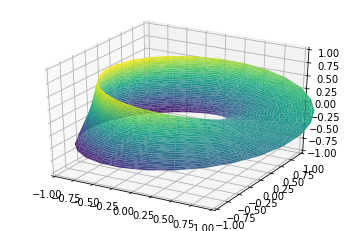

In [23]:
#триангуляция в координатах базовой параметризации        
from matplotlib.tri import Triangulation        
tri = Triangulation(np.ravel(v), np.ravel(u))
ax = plt.axes(projection='3d')        
ax.plot_trisurf(x, y, z, triangles=tri.triangles,cmap='viridis', linewidths=0.2);
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);